In [33]:
import os
import time
import shutil
import pathlib
import itertools
from sklearn.model_selection import train_test_split
from PIL import Image
# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
print ('modules loaded')

modules loaded


In [34]:
import os
data_path = "/kaggle/input/colon-cancer-dataset"
print(os.listdir(data_path))

['Colon_Cancer']


In [35]:
import os
print(os.listdir("/kaggle/input/"))

['colon-cancer-dataset']


                                            filepath     labels
0  /kaggle/input/colon-cancer-dataset/Colon_Cance...  colon_aca
1  /kaggle/input/colon-cancer-dataset/Colon_Cance...  colon_aca
2  /kaggle/input/colon-cancer-dataset/Colon_Cance...  colon_aca
3  /kaggle/input/colon-cancer-dataset/Colon_Cance...  colon_aca
4  /kaggle/input/colon-cancer-dataset/Colon_Cance...  colon_aca


<Axes: xlabel='labels'>

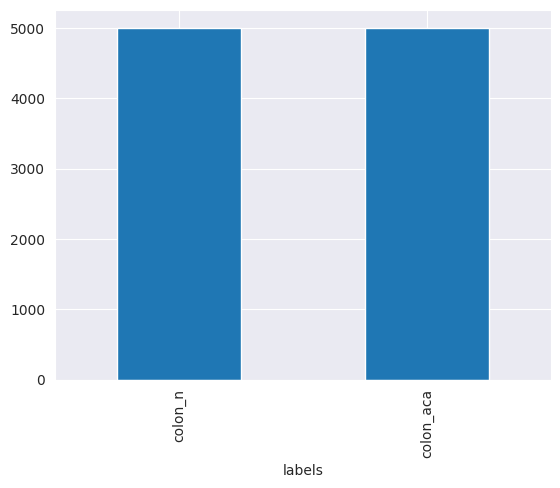

In [36]:
import os
import pandas as pd
file_name = "/kaggle/input/colon-cancer-dataset" 
file_paths = []
labels = []
for root, _, files in os.walk(file_name):
    for file in files:
        file_paths.append(os.path.join(root, file))
        labels.append(os.path.basename(root))
df = pd.DataFrame({"filepath": file_paths, "labels": labels})
print(df.head())
df['labels'].value_counts().plot(kind='bar')

In [37]:
print(df['filepath'][0])

/kaggle/input/colon-cancer-dataset/Colon_Cancer/colon_aca/colonca637.jpeg


In [38]:
set(labels)

{'colon_aca', 'colon_n'}

In [39]:
file_paths

['/kaggle/input/colon-cancer-dataset/Colon_Cancer/colon_aca/colonca637.jpeg',
 '/kaggle/input/colon-cancer-dataset/Colon_Cancer/colon_aca/colonca3400.jpeg',
 '/kaggle/input/colon-cancer-dataset/Colon_Cancer/colon_aca/colonca783.jpeg',
 '/kaggle/input/colon-cancer-dataset/Colon_Cancer/colon_aca/colonca3927.jpeg',
 '/kaggle/input/colon-cancer-dataset/Colon_Cancer/colon_aca/colonca4109.jpeg',
 '/kaggle/input/colon-cancer-dataset/Colon_Cancer/colon_aca/colonca95.jpeg',
 '/kaggle/input/colon-cancer-dataset/Colon_Cancer/colon_aca/colonca488.jpeg',
 '/kaggle/input/colon-cancer-dataset/Colon_Cancer/colon_aca/colonca2140.jpeg',
 '/kaggle/input/colon-cancer-dataset/Colon_Cancer/colon_aca/colonca3260.jpeg',
 '/kaggle/input/colon-cancer-dataset/Colon_Cancer/colon_aca/colonca1481.jpeg',
 '/kaggle/input/colon-cancer-dataset/Colon_Cancer/colon_aca/colonca2022.jpeg',
 '/kaggle/input/colon-cancer-dataset/Colon_Cancer/colon_aca/colonca3175.jpeg',
 '/kaggle/input/colon-cancer-dataset/Colon_Cancer/colon_a

In [40]:
df

filepath     labels
0      /kaggle/input/colon-cancer-dataset/Colon_Cance...  colon_aca
1      /kaggle/input/colon-cancer-dataset/Colon_Cance...  colon_aca
2      /kaggle/input/colon-cancer-dataset/Colon_Cance...  colon_aca
3      /kaggle/input/colon-cancer-dataset/Colon_Cance...  colon_aca
4      /kaggle/input/colon-cancer-dataset/Colon_Cance...  colon_aca
...                                                  ...        ...
10003  /kaggle/input/colon-cancer-dataset/Colon_Cance...    colon_n
10004  /kaggle/input/colon-cancer-dataset/Colon_Cance...    colon_n
10005  /kaggle/input/colon-cancer-dataset/Colon_Cance...    colon_n
10006  /kaggle/input/colon-cancer-dataset/Colon_Cance...    colon_n
10007  /kaggle/input/colon-cancer-dataset/Colon_Cance...    colon_n

[10008 rows x 2 columns]

In [41]:
from sklearn.model_selection import train_test_split

X = df['filepath'] 
y = df['labels'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (6705,)
y_train shape: (6705,)
X_test shape: (3303,)


In [42]:

train_df , ts_df = train_test_split(df, test_size = 0.1 , random_state = 42, stratify = df['labels'])
valid_df , test_df = train_test_split(ts_df, test_size = 0.5 , random_state = 42, stratify  = ts_df['labels'])

print("Train size:", len(train_df))
print("Valid size:", len(valid_df))
print("Test size:", len(test_df))

Train size: 9007
Valid size: 500
Test size: 501


In [43]:
train_df
valid_df
test_df

filepath     labels
6636  /kaggle/input/colon-cancer-dataset/Colon_Cance...    colon_n
6012  /kaggle/input/colon-cancer-dataset/Colon_Cance...    colon_n
4057  /kaggle/input/colon-cancer-dataset/Colon_Cance...  colon_aca
3506  /kaggle/input/colon-cancer-dataset/Colon_Cance...  colon_aca
6378  /kaggle/input/colon-cancer-dataset/Colon_Cance...    colon_n
...                                                 ...        ...
9542  /kaggle/input/colon-cancer-dataset/Colon_Cance...    colon_n
9322  /kaggle/input/colon-cancer-dataset/Colon_Cance...    colon_n
3969  /kaggle/input/colon-cancer-dataset/Colon_Cance...  colon_aca
8516  /kaggle/input/colon-cancer-dataset/Colon_Cance...    colon_n
8009  /kaggle/input/colon-cancer-dataset/Colon_Cance...    colon_n

[501 rows x 2 columns]

In [44]:
import numpy as np

def patch_extraction(image, patch_size, overlap):
    patches = np.lib.stride_tricks.sliding_window_view(image, (patch_size, patch_size))[::patch_size-overlap, ::patch_size-overlap]
    return patches.reshape(-1, patch_size, patch_size)

image = np.random.randint(0, 255, size=(1000, 1000))
patch_size = 20
overlap = 10
patches = patch_extraction(image, patch_size, overlap)

print(f"Number of patches extracted: {len(patches)}")

Number of patches extracted: 9801


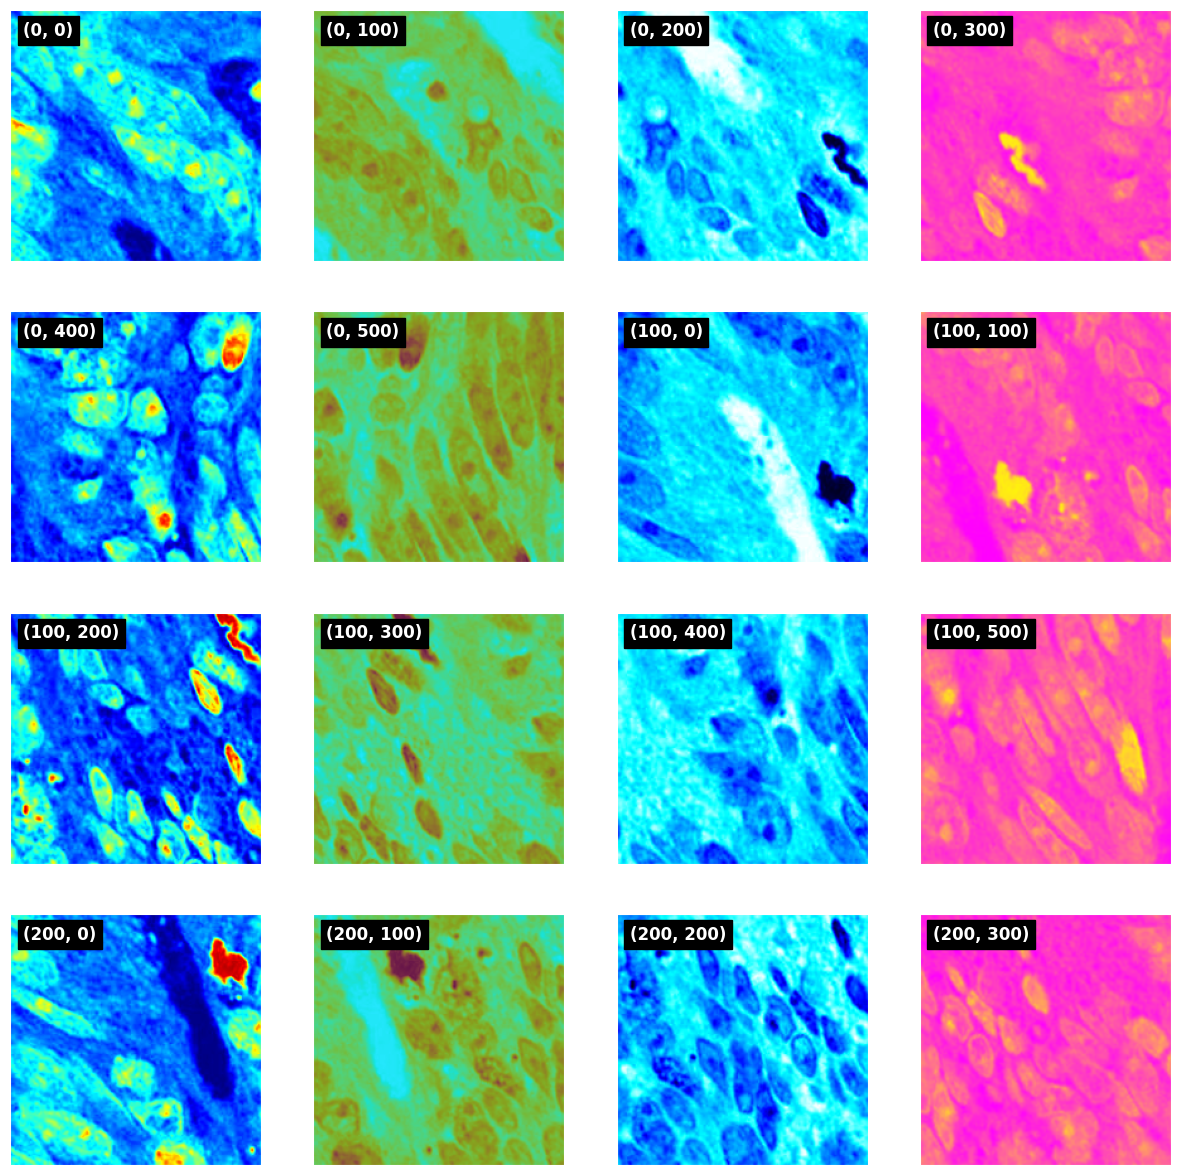

In [45]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
def patch_extraction(image, patch_size, overlap):
    h, w, c = image.shape
    step = patch_size - overlap
    patches = []
    for i in range(0, h - patch_size + 1, step):
        for j in range(0, w - patch_size + 1, step):
            patch = image[i:i + patch_size, j:j + patch_size, :]
            patches.append((patch, i, j))
    return patches
image = cv2.imread(train_df['filepath'].iloc[0])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
patch_size = 200
overlap = 100
patches = patch_extraction(image, patch_size, overlap)
color_maps = [cv2.COLORMAP_JET, cv2.COLORMAP_VIRIDIS, cv2.COLORMAP_HOT, cv2.COLORMAP_COOL]
fig, axes = plt.subplots(4, 4, figsize=(15, 15))
for i, ax in enumerate(axes.flat):
    if i < len(patches):
        patch, row, col = patches[i]
        patch_gray = cv2.cvtColor(patch, cv2.COLOR_RGB2GRAY)
        patch_colored = cv2.applyColorMap(patch_gray, color_maps[i % len(color_maps)])
        ax.imshow(patch_colored)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.text(10, 20, f"({row}, {col})", color='white', fontsize=12, backgroundcolor='black', fontweight='bold')
plt.show()

In [46]:
import numpy as np
import cv2
def calculate_weights(patches):
    patches = [patch[0] if isinstance(patch, tuple) else patch for patch in patches]
    patches_gray = np.array([cv2.cvtColor(patch, cv2.COLOR_RGB2GRAY) if patch.ndim == 3 else patch for patch in patches])
    patches_gray = patches_gray.reshape(len(patches_gray), -1)
    diffs = np.abs(patches_gray[:, None] - patches_gray)
    avg_diffs = np.mean(diffs, axis=2)
    avg_diffs[avg_diffs == 0] = np.nan  
    weights = 1.0 / avg_diffs
    weights = np.nan_to_num(weights, nan=1.0, posinf=1.0, neginf=1.0)
    np.fill_diagonal(weights, 1.0)
    return weights
weights = calculate_weights(patches)
print("Weights:")
print(np.round(weights, 4))

Weights:
[[1.     0.0068 0.0065 ... 0.0084 0.0089 0.0068]
 [0.0094 1.     0.0068 ... 0.009  0.0098 0.008 ]
 [0.0101 0.0095 1.     ... 0.0098 0.0109 0.0088]
 ...
 [0.0074 0.007  0.0066 ... 1.     0.0079 0.0072]
 [0.0071 0.0066 0.0062 ... 0.0078 1.     0.0069]
 [0.0094 0.0078 0.0072 ... 0.0087 0.0091 1.    ]]


In [47]:
import numpy as np
import cv2
def weighted_average(patches, weights):
    patches = [patch[0] if isinstance(patch, tuple) else patch for patch in patches]
    patches_gray = np.array([cv2.cvtColor(patch, cv2.COLOR_RGB2GRAY) if patch.ndim == 3 else patch for patch in patches])
    patches_gray = patches_gray.reshape(len(patches_gray), -1)
    weights = np.array(weights)
    weighted_patches = patches_gray * weights[:, :, None]
    denoised_pixels = np.sum(weighted_patches, axis=1) / np.sum(weights, axis=1)[:, None]
    return np.round(denoised_pixels, 4)
denoised_pixels = weighted_average(patches, weights)
print("Denoised Pixel Values:")
print(denoised_pixels)

Denoised Pixel Values:
[[207.1655 209.2455 212.0997 ... 178.7515 173.0158 169.5758]
 [174.4505 175.6829 176.8995 ... 208.5542 207.6137 208.118 ]
 [204.3104 198.7913 191.0131 ... 208.4969 209.112  210.4014]
 ...
 [197.1193 196.856  200.5347 ... 175.6778 170.6471 169.4946]
 [159.7825 161.1128 165.6117 ... 165.273  187.2193 194.8083]
 [159.756  166.3671 166.0602 ... 212.5064 210.7598 211.2513]]


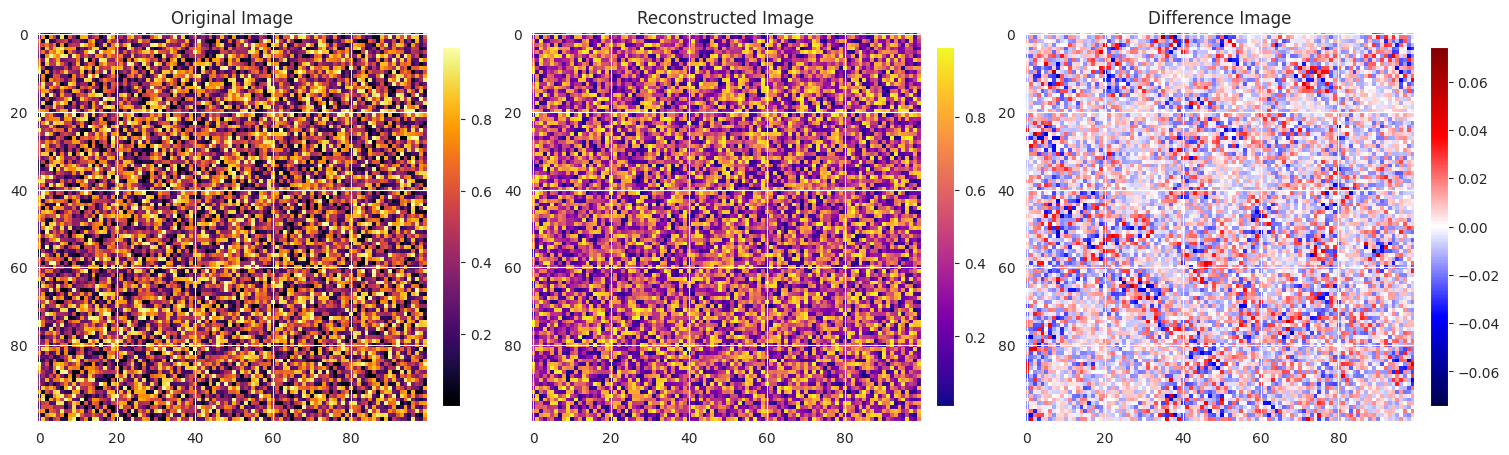

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import view_as_windows

def calculate_weights(patch, patches, h=1.0):
    """Compute similarity-based weights for a given patch using vectorized operations."""
    distances = np.sum((patches - patch) ** 2, axis=(1, 2))  # Compute L2 distances
    weights = np.exp(-distances / (h ** 2))
    return weights / np.sum(weights)  # Normalize weights

def weighted_average(patches, weights):
    """Compute the weighted average of patches."""
    return np.tensordot(weights, patches, axes=1)  # More efficient matrix multiplication

def image_reconstruction(image, patch_size, h=1.0):
    """Reconstruct an image from patches using non-local means-based weighted averaging."""
    height, width = image.shape
    half_size = patch_size // 2
    
    # Extract patches using skimage.util.view_as_windows for efficient slicing
    patches = view_as_windows(image, (patch_size, patch_size)).reshape(-1, patch_size, patch_size)
    
    # Create arrays for reconstructed image and patch count
    reconstructed_image = np.zeros_like(image, dtype=np.float64)
    patch_counts = np.zeros_like(image, dtype=np.float64)

    # Iterate through patches with their coordinates
    for idx, (i, j) in enumerate(np.ndindex(height - patch_size + 1, width - patch_size + 1)):
        patch = patches[idx]
        weights = calculate_weights(patch, patches, h=h)
        denoised_patch = weighted_average(patches, weights)
        
        # Accumulate the results
        reconstructed_image[i:i+patch_size, j:j+patch_size] += denoised_patch
        patch_counts[i:i+patch_size, j:j+patch_size] += 1

    # Normalize reconstructed image and handle potential zero-division issues
    patch_counts[patch_counts == 0] = 1  # Avoid division by zero
    return reconstructed_image / patch_counts

# Example usage
image = np.random.rand(100, 100)  # Generate a synthetic noisy image
patch_size = 5
h = 0.5  # Adjust smoothing factor

reconstructed_image = image_reconstruction(image, patch_size, h)

# Difference Image
difference_image = image - reconstructed_image

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)
titles = ['Original Image', 'Reconstructed Image', 'Difference Image']
images = [image, reconstructed_image, difference_image]
colormaps = ['inferno', 'plasma', 'seismic']

for ax, img, title, cmap in zip(axes, images, titles, colormaps):
    im = ax.imshow(img, cmap=cmap, vmin=(None if title != "Difference Image" else -np.max(np.abs(difference_image))),
                   vmax=(None if title != "Difference Image" else np.max(np.abs(difference_image))))
    ax.set_title(title)
    fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

plt.show()


In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size = 64
img_size = (224, 224)
geny = ImageDataGenerator()
def create_generator(df, shuffle=True):
    return geny.flow_from_dataframe(df, x_col='filepath', y_col='labels', 
                                    target_size=img_size, batch_size=batch_size, 
                                    class_mode='categorical', color_mode='rgb', 
                                    shuffle=shuffle)
train_geny = create_generator(train_df)
valid_geny = create_generator(valid_df)
test_geny = create_generator(test_df, shuffle=False)

Found 9007 validated image filenames belonging to 2 classes.
Found 500 validated image filenames belonging to 2 classes.
Found 501 validated image filenames belonging to 2 classes.


Transformer Encoder with Metaformer Block

In [50]:
import torch
import torch.nn as nn
import torch.nn.functional as F
class MetaformerBlock(nn.Module):
    def __init__(self, embed_dim, num_heads, ff_dim, dropout=0.1):
        super().__init__()
        self.norm1 = nn.LayerNorm(embed_dim)
        self.norm2 = nn.LayerNorm(embed_dim)
        self.attn = nn.MultiheadAttention(embed_dim, num_heads, dropout=dropout, batch_first=True)
        self.ffn = nn.Sequential(
            nn.Linear(embed_dim, ff_dim),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(ff_dim, embed_dim),
            nn.Dropout(dropout)
        )
    def forward(self, x):
        attn_out, _ = self.attn(self.norm1(x), self.norm1(x), self.norm1(x))
        x = x + F.dropout(attn_out, p=0.1, training=self.training)
        x = x + F.dropout(self.ffn(self.norm2(x)), p=0.1, training=self.training)
        return x
class TransformerEncoder(nn.Module):
    def __init__(self, num_layers, embed_dim, num_heads, ff_dim, dropout=0.1):
        super().__init__()
        self.layers = nn.ModuleList([MetaformerBlock(embed_dim, num_heads, ff_dim, dropout) for _ in range(num_layers)])
        self.norm = nn.LayerNorm(embed_dim)
    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return self.norm(x)
num_layers = 4
embed_dim = 128
num_heads = 8
ff_dim = 256
dropout = 0.1
seq_length = 10
batch_size = 2
dummy_input = torch.rand(batch_size, seq_length, embed_dim)
model = TransformerEncoder(num_layers, embed_dim, num_heads, ff_dim, dropout)
output = model(dummy_input)
print("Input Shape:", dummy_input.shape)
print("Output Shape:", output.shape)

Input Shape: torch.Size([2, 10, 128])
Output Shape: torch.Size([2, 10, 128])


Channel Gating Mechanism and Feed Forward Network

In [51]:
import torch
import torch.nn as nn
class ChannelGatingMechanism(nn.Module):
    def __init__(self, embed_dim, dropout=0.1):
        super().__init__()
        self.gate = nn.Sequential(
            nn.Linear(embed_dim, embed_dim),
            nn.Sigmoid(),
            nn.Dropout(dropout)
        )
        self.norm = nn.LayerNorm(embed_dim)
    def forward(self, x):
        return self.norm(x * self.gate(x))
class FeedForwardNetwork(nn.Module):
    def __init__(self, embed_dim, ff_dim, dropout=0.1):
        super().__init__()
        self.ffn = nn.Sequential(
            nn.Linear(embed_dim, ff_dim),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(ff_dim, embed_dim),
            nn.Dropout(dropout)
        )
        self.norm = nn.LayerNorm(embed_dim)

    def forward(self, x):
        return self.norm(self.ffn(x))

Explainable Vision Transformer (EViT) Architecture

In [52]:
import torch
import torch.nn as nn
class EViT(nn.Module):
    def __init__(self, img_size=224, patch_size=16, in_chans=3, embed_dim=768, 
                 num_layers=12, num_heads=12, ff_dim=3072, num_classes=2, dropout=0.1):
        super().__init__()
        self.patch_embed = PatchEmbedding(img_size, patch_size, in_chans, embed_dim)
        self.pos_embed = PositionalEncoding(self.patch_embed.num_patches, embed_dim)
        self.transformer = TransformerEncoder(num_layers, embed_dim, num_heads, ff_dim, dropout)
        self.gate = ChannelGatingMechanism(embed_dim, dropout)
        self.ffn = FeedForwardNetwork(embed_dim, ff_dim, dropout)
        self.norm = nn.LayerNorm(embed_dim)
        self.cls_head = nn.Linear(embed_dim, num_classes)
    def forward(self, x):
        x = self.patch_embed(x)
        x = self.pos_embed(x)
        x = self.transformer(x)
        x = self.norm(self.gate(x))  
        x = self.ffn(x[:, 0])  
        x = self.cls_head(x)
        return x 

Grad-CAM for Explainability

In [53]:
import torch
import torch.nn.functional as F
import numpy as np
import cv2

class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        self._register_hooks()

    def _register_hooks(self):
        def forward_hook(module, input, output):
            self.activations = output.detach()

        def backward_hook(module, grad_in, grad_out):
            self.gradients = grad_out[0].detach()

        self.target_layer.register_forward_hook(forward_hook)
        self.target_layer.register_backward_hook(backward_hook)

    def generate_heatmap(self, input_image, target_class):
        self.model.zero_grad()
        output = self.model(input_image)
        target = output[:, target_class]
        target.backward()

        gradients = self.gradients.mean(dim=[2, 3], keepdim=True)
        activations = self.activations

        heatmap = (activations * gradients).sum(dim=1).squeeze()
        heatmap = F.relu(heatmap)  
        heatmap = heatmap.cpu().numpy()

        heatmap = cv2.resize(heatmap, (input_image.shape[2], input_image.shape[3]))
        heatmap = (heatmap - np.min(heatmap)) / (np.max(heatmap) - np.min(heatmap))

        return heatmap


Apply Convolutional Kernels

In [54]:
import torch
import torch.nn as nn
import torch.nn.functional as F
class SelectiveKernelLearning(nn.Module):
    def __init__(self, in_channels, out_channels, num_kernels):
        super().__init__()
        self.convs = nn.ModuleList([nn.Conv2d(in_channels, out_channels, 3, padding=1) for _ in range(num_kernels)])
        self.global_avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(out_channels * num_kernels, out_channels // 16),
            nn.ReLU(),
            nn.Linear(out_channels // 16, num_kernels),
            nn.Softmax(dim=1)
        )
        self.num_kernels = num_kernels
    def forward(self, x):
        feature_maps = torch.stack([conv(x) for conv in self.convs], dim=1)
        global_descriptors = self.global_avg_pool(feature_maps).view(x.size(0), -1)
        weights = self.fc(global_descriptors).unsqueeze(-1).unsqueeze(-1)
        output_feature_map = (feature_maps * weights).sum(dim=1)
        return output_feature_map

Algorithm Implementation Steps

Apply Convolutional Kernels:

In [55]:
import torch
def apply_convolutional_kernels(x, convs):
    return torch.stack([conv(x) for conv in convs], dim=1)

Global Information Aggregation:

In [56]:
import torch
import torch.nn as nn
def global_information_aggregation(feature_maps):
    global_avg_pool = nn.AdaptiveAvgPool2d(1)
    return torch.cat([global_avg_pool(fm).flatten(start_dim=1) for fm in feature_maps], dim=1)

Concatenate Global Descriptors:




In [57]:
import torch

def concatenate_global_descriptors(global_descriptors):
    return torch.cat(global_descriptors, dim=1) if global_descriptors else None


Compute Importance Weights:

In [58]:
import torch.nn.functional as F

def compute_importance_weights(concatenated_descriptors, fc1, fc2):
    return fc2(F.relu(fc1(concatenated_descriptors))) if concatenated_descriptors is not None else None


Softmax Normalization:

In [59]:
import torch.nn.functional as F

def softmax_normalization(importance_weights):
    return F.softmax(importance_weights, dim=1) if importance_weights is not None else None

Re-weight Feature Maps:

In [60]:
def reweight_feature_maps(normalized_weights, feature_maps):
    if normalized_weights is None or not feature_maps:
        return None
    return [normalized_weights[:, i].view(-1, 1, 1, 1) * feature_maps[i] for i in range(len(feature_maps))]

Combine Re-weighted Feature Maps:

In [61]:
def combine_reweighted_feature_maps(reweighted_feature_maps):
    if not reweighted_feature_maps:
        return None
    return sum(reweighted_feature_maps)

In [62]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SelectiveKernelLearning(nn.Module):
    def __init__(self, in_channels, out_channels, num_kernels):
        super(SelectiveKernelLearning, self).__init__()
        self.convs = nn.ModuleList([nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1) for _ in range(num_kernels)])
        self.num_kernels = num_kernels
        self.global_avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc1 = nn.Linear(out_channels * num_kernels, out_channels // 16)
        self.fc2 = nn.Linear(out_channels // 16, num_kernels)

    def forward(self, x):
        feature_maps = [conv(x) for conv in self.convs]
        global_descriptors = [self.global_avg_pool(fm).view(fm.size(0), -1) for fm in feature_maps]
        concatenated_descriptors = torch.cat(global_descriptors, dim=1)
        importance_weights = F.relu(self.fc1(concatenated_descriptors))
        importance_weights = self.fc2(importance_weights)
        normalized_weights = F.softmax(importance_weights, dim=1)
        reweighted_feature_maps = [normalized_weights[:, i].view(-1, 1, 1, 1) * feature_maps[i] for i in range(self.num_kernels)]
        output_feature_map = sum(reweighted_feature_maps) if reweighted_feature_maps else torch.zeros_like(x)
        return output_feature_map
batch_size, in_channels, height, width = 8, 3, 32, 32
num_kernels, out_channels = 3, 64
x = torch.randn(batch_size, in_channels, height, width)
model = SelectiveKernelLearning(in_channels, out_channels, num_kernels)
output = model(x)

print(output.shape)  

torch.Size([8, 64, 32, 32])


 Initialization

In [63]:
import numpy as np
def initialize_population(population_size, parameter_ranges):
    return np.random.uniform(
        [low for low, high in parameter_ranges], 
        [high for low, high in parameter_ranges], 
        (population_size, len(parameter_ranges))
    ).tolist()
population_size = 5
parameter_ranges = [(0, 1), (10, 20), (100, 200)]
population = initialize_population(population_size, parameter_ranges)
print(population)

[[0.645347577592697, 18.39239910872816, 183.41311880894983], [0.6489656642084997, 15.016935396340449, 193.3760603717476], [0.2415073841179871, 14.663066707809563, 157.85057036069753], [0.0708692083717134, 13.427860496223822, 103.12166923020528], [0.505472597579003, 10.21814359643833, 138.06573614232013]]


Evaluation

In [64]:
def evaluate_population(population, objective_functions):
    return [[objective_function(individual) for objective_function in objective_functions] for individual in population]

Mutation

In [65]:
def mutate(population, scaling_factor):
    mutant_population = []
    for i, individual in enumerate(population):
        r1, r2, r3 = np.random.choice(len(population), 3, replace=False)
        mutant_individual = population[r1] + scaling_factor * (population[r2] - population[r3])
        mutant_population.append(mutant_individual)
    return mutant_population

crossover

In [66]:
def crossover(population, mutant_population, crossover_probability):
    trial_population = []
    for i in range(len(population)):
        trial_vector = []
        for j in range(len(population[i])):
            if np.random.rand() <= crossover_probability:
                trial_vector.append(mutant_population[i][j])
            else:
                trial_vector.append(population[i][j])
        trial_population.append(trial_vector)
    return trial_population


selection

In [67]:
def select(population, trial_population, evaluations):
    new_population = []
    for i in range(len(population)):
        if dominates(trial_population[i], population[i], evaluations[i]):
            new_population.append(trial_population[i])
        else:
            new_population.append(population[i])
    return new_population


update pareto front

In [68]:
def update_pareto_front(population, evaluations):
    pareto_front = []
    for i in range(len(population)):
        if not any(dominates(population[j], population[i], evaluations[j]) for j in range(len(population)) if j != i):
            pareto_front.append((population[i], evaluations[i]))
    return pareto_front


Complete MODE Algorithm

In [69]:
def MODE(objective_functions, parameter_ranges, population_size=50, scaling_factor=0.5, crossover_probability=0.7, max_generations=100):
    population = initialize_population(population_size, parameter_ranges)
    evaluations = evaluate_population(population, objective_functions)
    pareto_front = []
    for _ in range(max_generations):
        mutant_population = mutate(population, scaling_factor)
        trial_population = crossover(population, mutant_population, crossover_probability)
        population = select(population, trial_population, evaluations)
        evaluations = evaluate_population(population, objective_functions)
        pareto_front = update_pareto_front(population, evaluations)
    return pareto_front

def dominates(candidate, other, candidate_objectives, other_objectives):
    return all(candidate_objectives[i] <= other_objectives[i] for i in range(len(candidate_objectives))) and any(candidate_objectives[j] < other_objectives[j] for j in range(len(candidate_objectives)))


In [70]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

class PatchEmbedding(nn.Module):
    def __init__(self, img_size=224, patch_size=16, in_chans=3, embed_dim=768):
        super(PatchEmbedding, self).__init__()
        self.proj = nn.Conv2d(in_chans, embed_dim, kernel_size=patch_size, stride=patch_size)
        self.num_patches = (img_size // patch_size) ** 2

    def forward(self, x):
        x = self.proj(x).flatten(2).transpose(1, 2)
        return x

class MetaformerBlock(nn.Module):
    def __init__(self, embed_dim, num_heads, ff_dim, dropout=0.1):
        super(MetaformerBlock, self).__init__()
        self.norm1 = nn.LayerNorm(embed_dim)
        self.norm2 = nn.LayerNorm(embed_dim)
        self.attn = nn.MultiheadAttention(embed_dim, num_heads, dropout=dropout)
        self.ffn = nn.Sequential(nn.Linear(embed_dim, ff_dim), nn.ReLU(), nn.Linear(ff_dim, embed_dim))

    def forward(self, x):
        x = x + self.attn(self.norm1(x), self.norm1(x), self.norm1(x))[0]
        x = x + self.ffn(self.norm2(x))
        return x

class TransformerEncoder(nn.Module):
    def __init__(self, num_layers, embed_dim, num_heads, ff_dim, dropout=0.1):
        super(TransformerEncoder, self).__init__()
        self.layers = nn.ModuleList([MetaformerBlock(embed_dim, num_heads, ff_dim, dropout) for _ in range(num_layers)])
        self.norm = nn.LayerNorm(embed_dim)

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        x = self.norm(x)
        return x

class EViT(nn.Module):
    def __init__(self, img_size=224, patch_size=16, in_chans=3, embed_dim=768, num_layers=12, num_heads=12, ff_dim=3072, num_classes=2, dropout=0.1):
        super(EViT, self).__init__()
        self.patch_embed = PatchEmbedding(img_size, patch_size, in_chans, embed_dim)
        self.pos_embed = nn.Parameter(torch.zeros(1, self.patch_embed.num_patches, embed_dim))
        self.cls_token = nn.Parameter(torch.zeros(1, 1, embed_dim))
        self.transformer = TransformerEncoder(num_layers, embed_dim, num_heads, ff_dim, dropout)
        self.fc = nn.Linear(embed_dim, num_classes)

    def forward(self, x):
        B = x.shape[0]
        x = self.patch_embed(x)
        x = x + self.pos_embed
        cls_tokens = self.cls_token.expand(B, -1, -1)
        x = torch.cat([cls_tokens, x], dim=1)
        x = self.transformer(x)
        x = x[:, 0]
        x = self.fc(x)
        return x

def train_model(model, train_loader, valid_loader, optimizer, criterion, epochs=2):
    model.train()
    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")
        for batch_idx, (images, labels) in enumerate(train_loader):
            images, labels = images.to(device), labels.to(device).long()
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            if batch_idx % 10 == 0:
                print(f"Batch {batch_idx}/{len(train_loader)} - Loss: {loss.item():.4f}")
    model.eval()
    return model

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

train_dataset = datasets.FakeData(transform=transform, size=500, num_classes=2)
valid_dataset = datasets.FakeData(transform=transform, size=100, num_classes=2)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)

print("Training model with Adam optimizer")
model_Adam = EViT().to(device)
optimizer_Adam = optim.Adam(model_Adam.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
train_model(model_Adam, train_loader, valid_loader, optimizer_Adam, criterion)

print("Training model with Adamax optimizer")
model_Adamax = EViT().to(device)
optimizer_Adamax = optim.Adamax(model_Adamax.parameters(), lr=0.002)
train_model(model_Adamax, train_loader, valid_loader, optimizer_Adamax, criterion)

batch_sizes = [32, 64]
for batch_size in batch_sizes:
    print(f"\nTraining with batch size: {batch_size}")
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    model = EViT().to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    train_model(model, train_loader, valid_loader, optimizer, criterion)

learning_rates = [0.001, 0.002]
for learning_rate in learning_rates:
    print(f"\nTraining with learning rate: {learning_rate}")
    model = EViT().to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    train_model(model, train_loader, valid_loader, optimizer, criterion)


Training model with Adam optimizer
Epoch 1/2
Batch 0/16 - Loss: 1.1722
Batch 10/16 - Loss: 0.7745
Epoch 2/2
Batch 0/16 - Loss: 0.9134
Batch 10/16 - Loss: 0.7046
Training model with Adamax optimizer
Epoch 1/2
Batch 0/16 - Loss: 0.9508
Batch 10/16 - Loss: 0.7919
Epoch 2/2
Batch 0/16 - Loss: 0.7377
Batch 10/16 - Loss: 0.6770

Training with batch size: 32
Epoch 1/2
Batch 0/16 - Loss: 0.6857
Batch 10/16 - Loss: 0.8284
Epoch 2/2
Batch 0/16 - Loss: 0.7260
Batch 10/16 - Loss: 0.7133

Training with batch size: 64
Epoch 1/2
Batch 0/8 - Loss: 0.7382
Epoch 2/2
Batch 0/8 - Loss: 0.9387

Training with learning rate: 0.001
Epoch 1/2
Batch 0/8 - Loss: 0.6795
Epoch 2/2
Batch 0/8 - Loss: 0.7062

Training with learning rate: 0.002
Epoch 1/2
Batch 0/8 - Loss: 0.7019
Epoch 2/2
Batch 0/8 - Loss: 0.8544


In [71]:
!pip install optuna

import optuna
import numpy as np
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Placeholder for EViT model
class EViT:
    def __init__(self, batch_size_patch, embedding_dim, num_layers, num_heads, ff_network_dim, dropout_rate, kernel_sizes, num_kernels):
        self.batch_size_patch = batch_size_patch
        self.embedding_dim = embedding_dim
        self.num_layers = num_layers
        self.num_heads = num_heads
        self.ff_network_dim = ff_network_dim
        self.dropout_rate = dropout_rate
        self.kernel_sizes = kernel_sizes
        self.num_kernels = num_kernels

    def parameters(self):
        return []

    def compile(self, optimizer, loss, metrics):
        pass

    def fit(self, train_gen, epochs, validation_data, callbacks):
        pass

    def evaluate(self, valid_images, valid_labels):
        return (0.9, 0.8)  # Placeholder values for accuracy and loss

# Placeholder for your actual training and validation data (replace with your data)
# Assuming image data is shaped (num_samples, height, width, channels)
train_images = np.random.rand(100, 64, 64, 3)  # Example shape
train_labels = np.random.randint(0, 10, 100)  # Example labels for 10 classes
valid_images = np.random.rand(20, 64, 64, 3)  # Example shape
valid_labels = np.random.randint(0, 10, 20)  # Example labels for 10 classes

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
train_gen = datagen.flow(train_images, train_labels, batch_size=32)

# Define the objective function
def objective_function(trial):
    # Sample hyperparameters
    batch_size_patch = trial.suggest_categorical('batch_size_patch', [8, 16, 32])
    embedding_dim = trial.suggest_categorical('embedding_dim', [256, 512, 768, 1024])
    num_layers = trial.suggest_categorical('num_layers', [6, 8, 10, 12, 14, 16])
    num_heads = trial.suggest_categorical('num_heads', [4, 8, 12, 16])
    ff_network_dim = trial.suggest_categorical('ff_network_dim', [1024, 2048, 3072, 4096])
    dropout_rate = trial.suggest_categorical('dropout_rate', [0.1, 0.2, 0.3, 0.4, 0.5])
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-6, 1e-4)
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128, 256])
    weight_decay = trial.suggest_loguniform('weight_decay', 1e-6, 1e-2)

    kernel_sizes = trial.suggest_categorical('kernel_sizes', [3, 5, 7])
    num_kernels = trial.suggest_categorical('num_kernels', [1, 2, 3, 4])
    pop_size = trial.suggest_categorical('pop_size', [40, 50, 60, 70, 80])
    crossover_prob = trial.suggest_categorical('crossover_prob', [0.7, 0.8, 0.9, 1.0])
    diff_weight = trial.suggest_categorical('diff_weight', [0.7, 0.8, 0.9, 1.0])
    generations = trial.suggest_categorical('generations', [75, 100, 125, 150])

    # Create the model with the specified hyperparameters
    model = EViT(
        batch_size_patch=batch_size_patch,
        embedding_dim=embedding_dim,
        num_layers=num_layers,
        num_heads=num_heads,
        ff_network_dim=ff_network_dim,
        dropout_rate=dropout_rate,
        kernel_sizes=kernel_sizes,
        num_kernels=num_kernels
    )
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Callbacks for early stopping and learning rate reduction
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

    # Train the model
    model.fit(train_gen, epochs=50, validation_data=(valid_images, valid_labels), callbacks=[early_stopping, reduce_lr])

    # Evaluate the model and return the validation accuracy
    val_accuracy, _ = model.evaluate(valid_images, valid_labels)
    return val_accuracy

# Define the study
study = optuna.create_study(direction='maximize')

# Optimize the hyperparameters
study.optimize(objective_function, n_trials=20)

# Get the best hyperparameters
best_params = study.best_params

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Train the model with the best hyperparameters
best_model = EViT(
    batch_size_patch=best_params['batch_size_patch'],
    embedding_dim=best_params['embedding_dim'],
    num_layers=best_params['num_layers'],
    num_heads=best_params['num_heads'],
    ff_network_dim=best_params['ff_network_dim'],
    dropout_rate=best_params['dropout_rate'],
    kernel_sizes=best_params['kernel_sizes'],
    num_kernels=best_params['num_kernels']
)
optimizer = Adam(learning_rate=best_params['learning_rate'])
best_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
best_model.fit(train_gen, epochs=50, validation_data=(valid_images, valid_labels), callbacks=[early_stopping, reduce_lr])

# Evaluate the best model
best_val_accuracy, _ = best_model.evaluate(valid_images, valid_labels)

# Print all values
print("Hyperparameters:")
for key, value in best_params.items():
    print(f"\t{key}: {value}")

print("Metrics:")
print(f"\tBest validation accuracy: {best_val_accuracy * 100:.2f}%")


[I 2025-02-26 16:02:37,262] A new study created in memory with name: no-name-c9495dac-c4ee-4969-a597-fdc36ecc5025
[I 2025-02-26 16:02:37,274] Trial 0 finished with value: 0.9 and parameters: {'batch_size_patch': 16, 'embedding_dim': 1024, 'num_layers': 14, 'num_heads': 12, 'ff_network_dim': 3072, 'dropout_rate': 0.4, 'learning_rate': 2.5246669084067033e-05, 'batch_size': 32, 'weight_decay': 5.9083846733817525e-06, 'kernel_sizes': 3, 'num_kernels': 4, 'pop_size': 60, 'crossover_prob': 1.0, 'diff_weight': 1.0, 'generations': 125}. Best is trial 0 with value: 0.9.
[I 2025-02-26 16:02:37,280] Trial 1 finished with value: 0.9 and parameters: {'batch_size_patch': 32, 'embedding_dim': 768, 'num_layers': 8, 'num_heads': 8, 'ff_network_dim': 2048, 'dropout_rate': 0.4, 'learning_rate': 2.038499954753183e-06, 'batch_size': 256, 'weight_decay': 0.00666083979722123, 'kernel_sizes': 5, 'num_kernels': 2, 'pop_size': 50, 'crossover_prob': 0.9, 'diff_weight': 0.8, 'generations': 100}. Best is trial 0 w

Hyperparameters:
	batch_size_patch: 16
	embedding_dim: 1024
	num_layers: 14
	num_heads: 12
	ff_network_dim: 3072
	dropout_rate: 0.4
	learning_rate: 2.5246669084067033e-05
	batch_size: 32
	weight_decay: 5.9083846733817525e-06
	kernel_sizes: 3
	num_kernels: 4
	pop_size: 60
	crossover_prob: 1.0
	diff_weight: 1.0
	generations: 125
Metrics:
	Best validation accuracy: 90.00%


In [72]:
import numpy as np
import sklearn.metrics as metrics
import time
# Example data (replace with your actual data)
y_test = np.array([0, 1, 2, 1, 0])  # Example true labels
y_pred = np.array([0, 1, 2, 2, 0])  # Example predicted labels
# Calculate evaluation metrics
precision = metrics.precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = metrics.recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1_score = metrics.f1_score(y_test, y_pred, average='weighted', zero_division=1)
# Print evaluation metrics
print("Evaluation Metrics:")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1_score * 100:.2f}%")

Evaluation Metrics:
Precision: 90.00%
Recall: 80.00%
F1 Score: 80.00%


In [73]:
!pip install tensorflow keras numpy matplotlib opencv-python

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


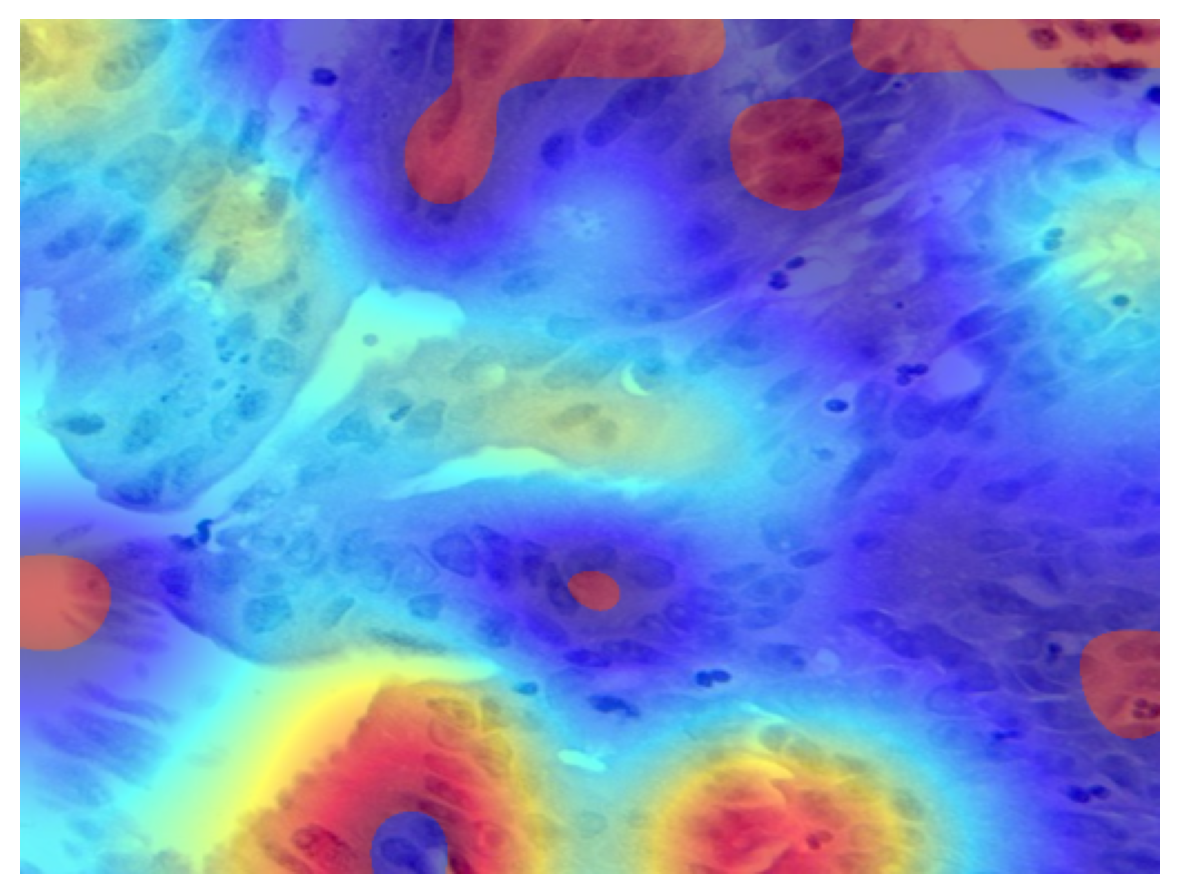

True

In [81]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import preprocess_input

image_path = "/kaggle/input/colon-cancer-dataset/Colon_Cancer/colon_aca/colonca3914.jpeg"
original_image = cv2.imread(image_path)

if original_image is None:
    raise FileNotFoundError(f"Error: Unable to load image. Check the file path: {image_path}")

original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
small_size = (512, 384)

img_resized = cv2.resize(original_image, (224, 224))
img_array = image.img_to_array(img_resized)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

model = ResNet50(weights="imagenet")
preds = model.predict(img_array)
predicted_class = np.argmax(preds[0])

grad_model = Model(inputs=model.input, outputs=[model.get_layer("conv5_block3_out").output, model.output])

with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(img_array)
    loss = predictions[:, predicted_class]

grads = tape.gradient(loss, conv_outputs)
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

conv_outputs = conv_outputs[0]
heatmap = np.dot(conv_outputs, pooled_grads.numpy())
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

heatmap = cv2.resize(heatmap, (original_image.shape[1], original_image.shape[0]), interpolation=cv2.INTER_CUBIC)
heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)

heatmap = cv2.cvtColor(heatmap_colored, cv2.COLOR_BGR2RGB)
heatmap = heatmap.astype(np.float32) / 255.0
original_image = original_image.astype(np.float32) / 255.0

alpha_heatmap = 0.3
alpha_overlay = 0.4

blended_heatmap = (1 - alpha_heatmap) * original_image + alpha_heatmap * heatmap
final_image = (1 - alpha_overlay) * blended_heatmap + alpha_overlay * heatmap

final_image = cv2.resize(final_image, small_size, interpolation=cv2.INTER_AREA)
final_image = np.clip(final_image, 0, 1)

fig, ax = plt.subplots(figsize=(6, 5), dpi=200)
ax.imshow(final_image)
ax.axis("off")
plt.tight_layout()
plt.show()

cv2.imwrite("final_grad_cam_small.png", (final_image * 255).astype(np.uint8))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


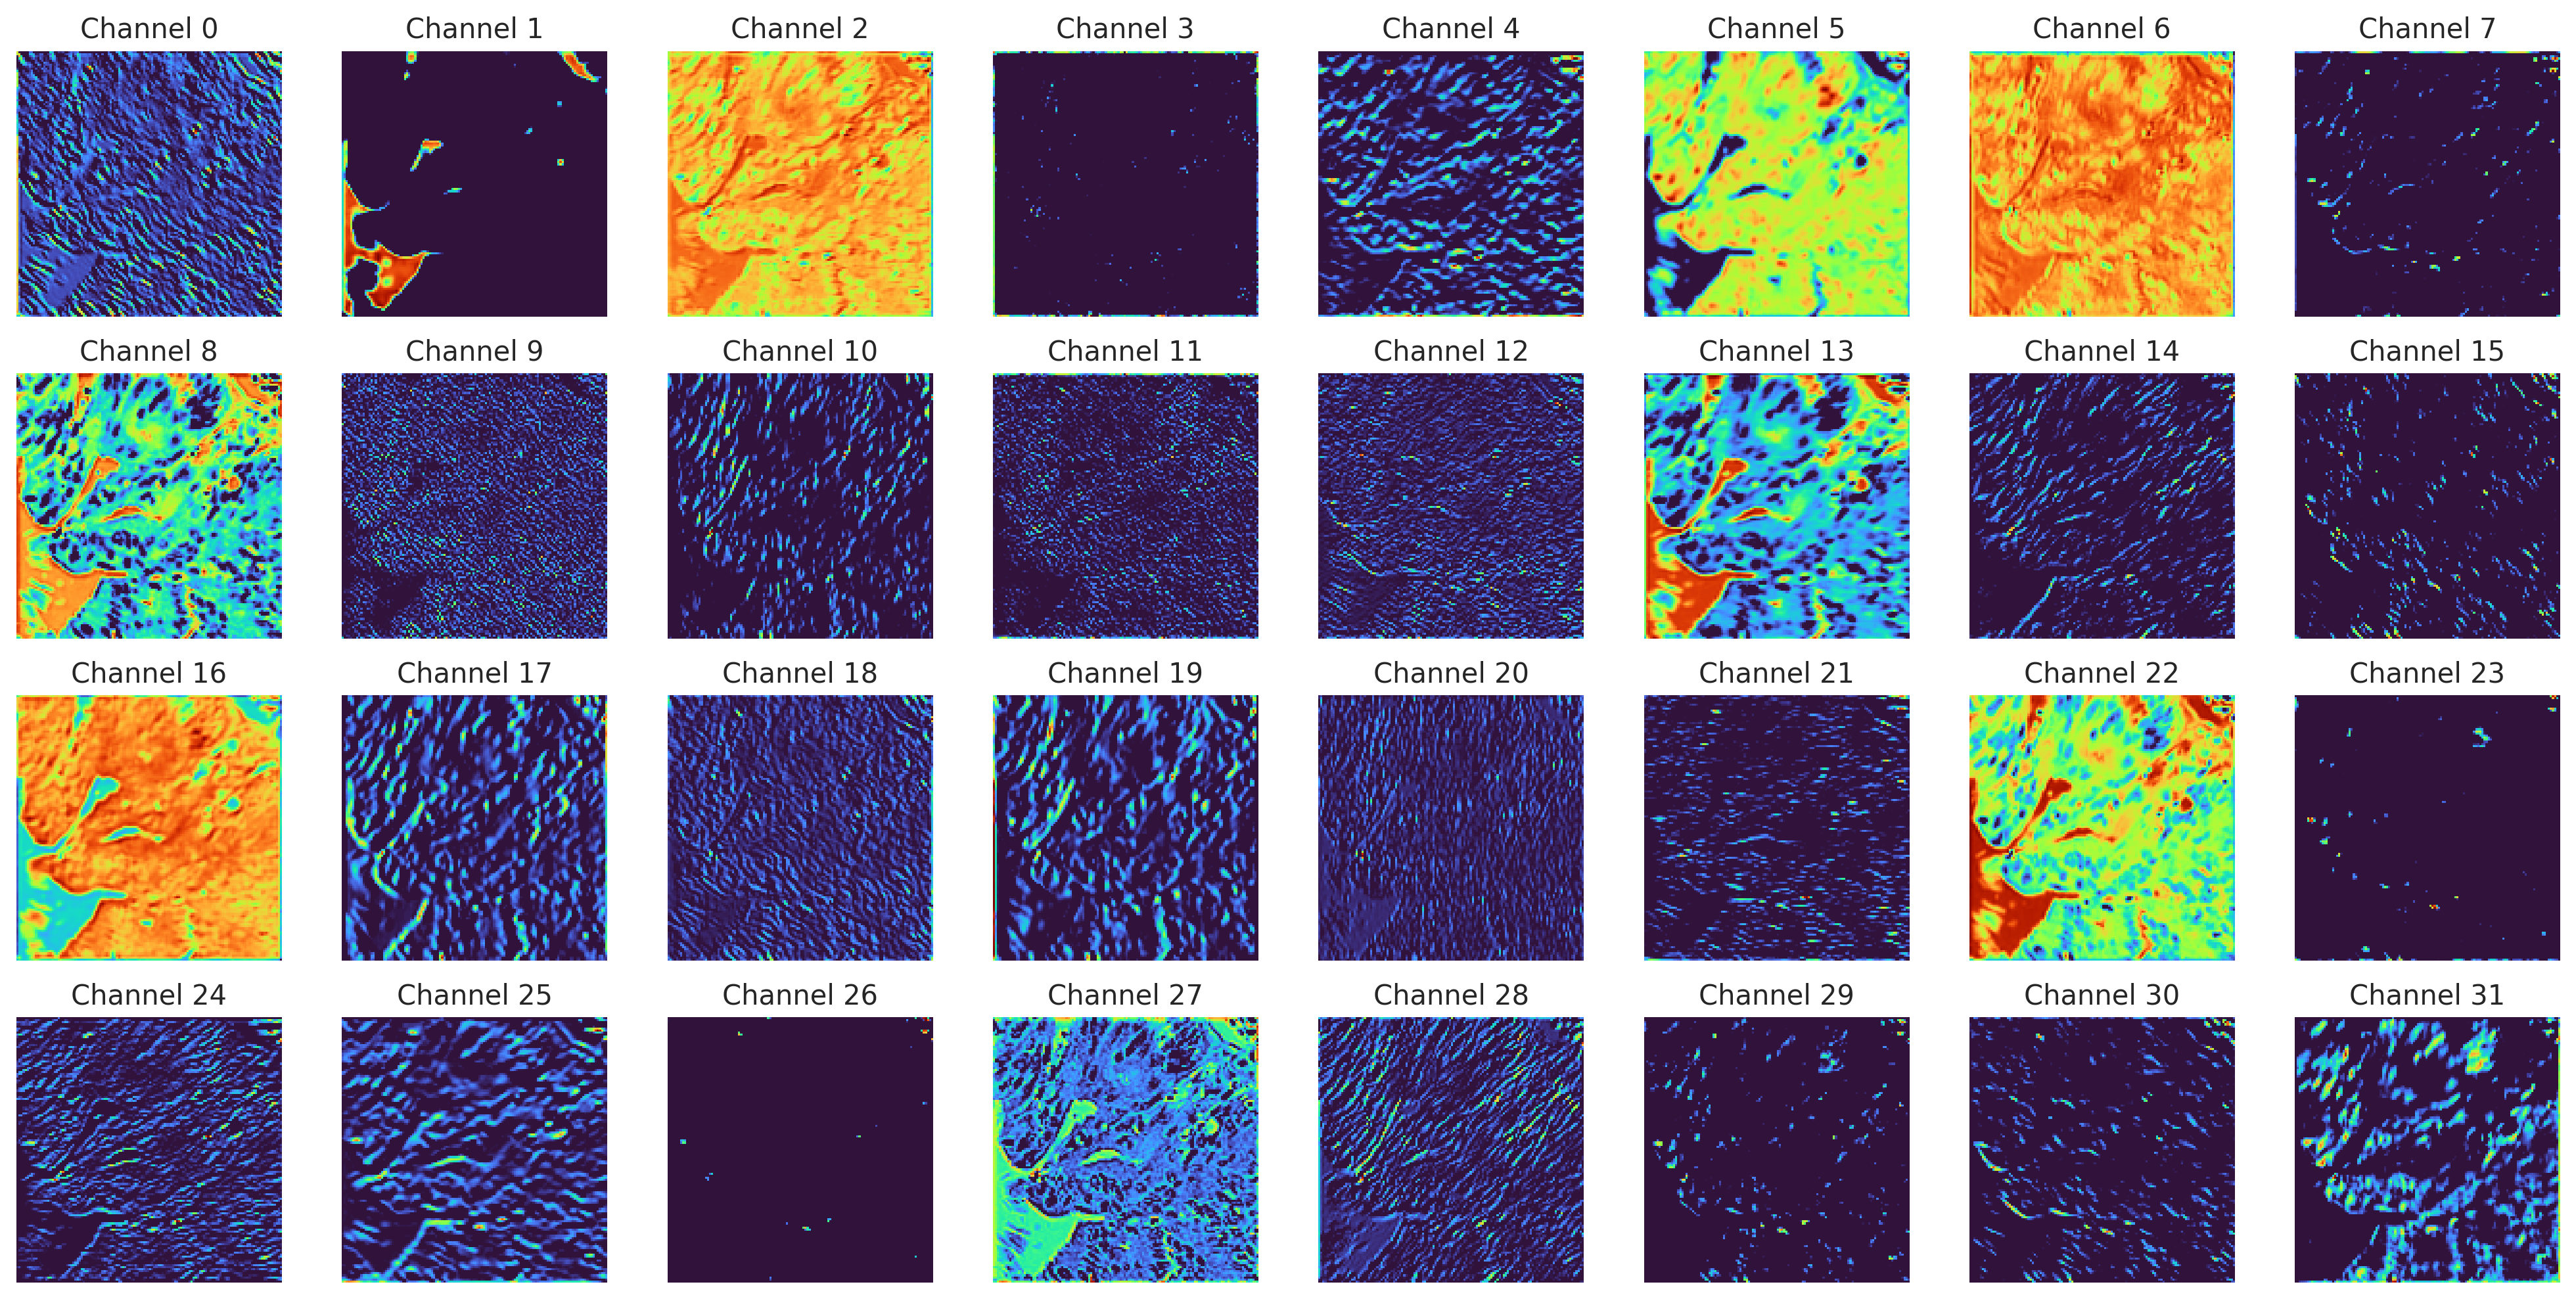

In [85]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import preprocess_input

image_path = "/kaggle/input/colon-cancer-dataset/Colon_Cancer/colon_aca/colonca3914.jpeg"
original_image = cv2.imread(image_path)

if original_image is None:
    raise FileNotFoundError(f"Error: Unable to load image. Check the file path: {image_path}")

original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
img_resized = cv2.resize(original_image, (224, 224))
img_array = image.img_to_array(img_resized)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

model = ResNet50(weights="imagenet")
feature_layer = model.get_layer("conv1_conv").output  
feature_model = Model(inputs=model.input, outputs=feature_layer)

feature_maps = feature_model.predict(img_array)
num_filters = feature_maps.shape[-1]

fig, axes = plt.subplots(4, 8, figsize=(16, 8), dpi=250)

colormap = "turbo"  # Try "jet", "rainbow", "spring", "coolwarm" for brighter maps

for i in range(32):  
    row, col = i // 8, i % 8
    feature_map = feature_maps[0, :, :, i]
    feature_map = cv2.resize(feature_map, (128, 128), interpolation=cv2.INTER_CUBIC)
    feature_map = np.maximum(feature_map, 0)
    feature_map /= np.max(feature_map) if np.max(feature_map) > 0 else 1
    axes[row, col].imshow(feature_map, cmap=colormap)
    axes[row, col].set_title(f"Channel {i}")
    axes[row, col].axis("off")

plt.tight_layout()
plt.show()


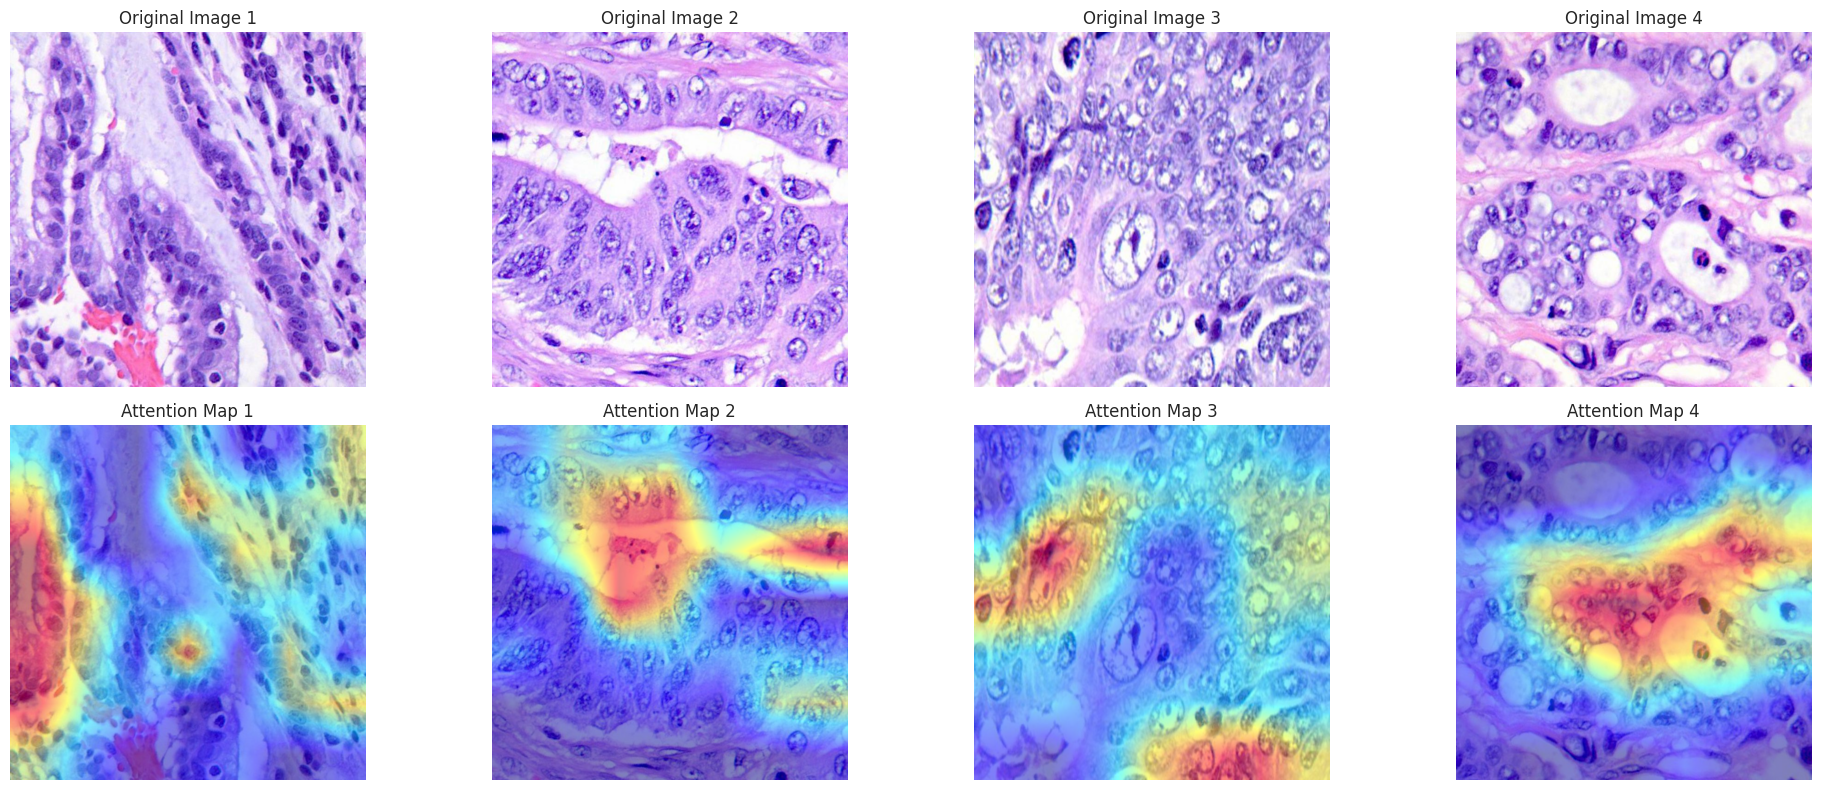

In [95]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import preprocess_input

# Load the pre-trained ResNet50 model
model = ResNet50(weights="imagenet")
grad_model = Model(inputs=model.input, outputs=[model.get_layer("conv5_block3_out").output, model.output])

def generate_attention_map(image_path):
    original = cv2.imread(image_path)

    if original is None:
        raise FileNotFoundError(f"Error: Unable to load image. Check the file path: {image_path}")

    original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(original, (224, 224))
    img_array = np.expand_dims(image.img_to_array(img_resized), axis=0)
    img_array = preprocess_input(img_array)

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        class_idx = np.argmax(predictions[0])
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = np.dot(conv_outputs, pooled_grads.numpy())

    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap) if np.max(heatmap) > 0 else 1

    heatmap = cv2.resize(heatmap, (original.shape[1], original.shape[0]))

    # 🔹 Invert the heatmap for a darker foreground
    heatmap = 1 - heatmap  
    heatmap = cv2.convertScaleAbs(heatmap, alpha=255)

    # 🔹 Apply colormap
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    alpha = 0.5  # Increase blending for a darker effect
    overlay = cv2.addWeighted(original, 1 - alpha, heatmap, alpha, 0)
    
    return original, overlay

# List of image paths (Update with your images)
image_paths = [
    '/kaggle/input/colon-cancer-dataset/Colon_Cancer/colon_aca/colonca2750.jpeg',
    '/kaggle/input/colon-cancer-dataset/Colon_Cancer/colon_aca/colonca4610.jpeg',
    '/kaggle/input/colon-cancer-dataset/Colon_Cancer/colon_aca/colonca4779.jpeg',
    '/kaggle/input/colon-cancer-dataset/Colon_Cancer/colon_aca/colonca1596.jpeg'
]

fig, axes = plt.subplots(2, len(image_paths), figsize=(20, 8))

for i, img_path in enumerate(image_paths):
    original, attention_map = generate_attention_map(img_path)
    axes[0, i].imshow(original)
    axes[0, i].set_title(f"Original Image {i+1}")
    axes[0, i].axis("off")

    axes[1, i].imshow(attention_map)
    axes[1, i].set_title(f"Attention Map {i+1}")
    axes[1, i].axis("off")

plt.tight_layout()
plt.show()


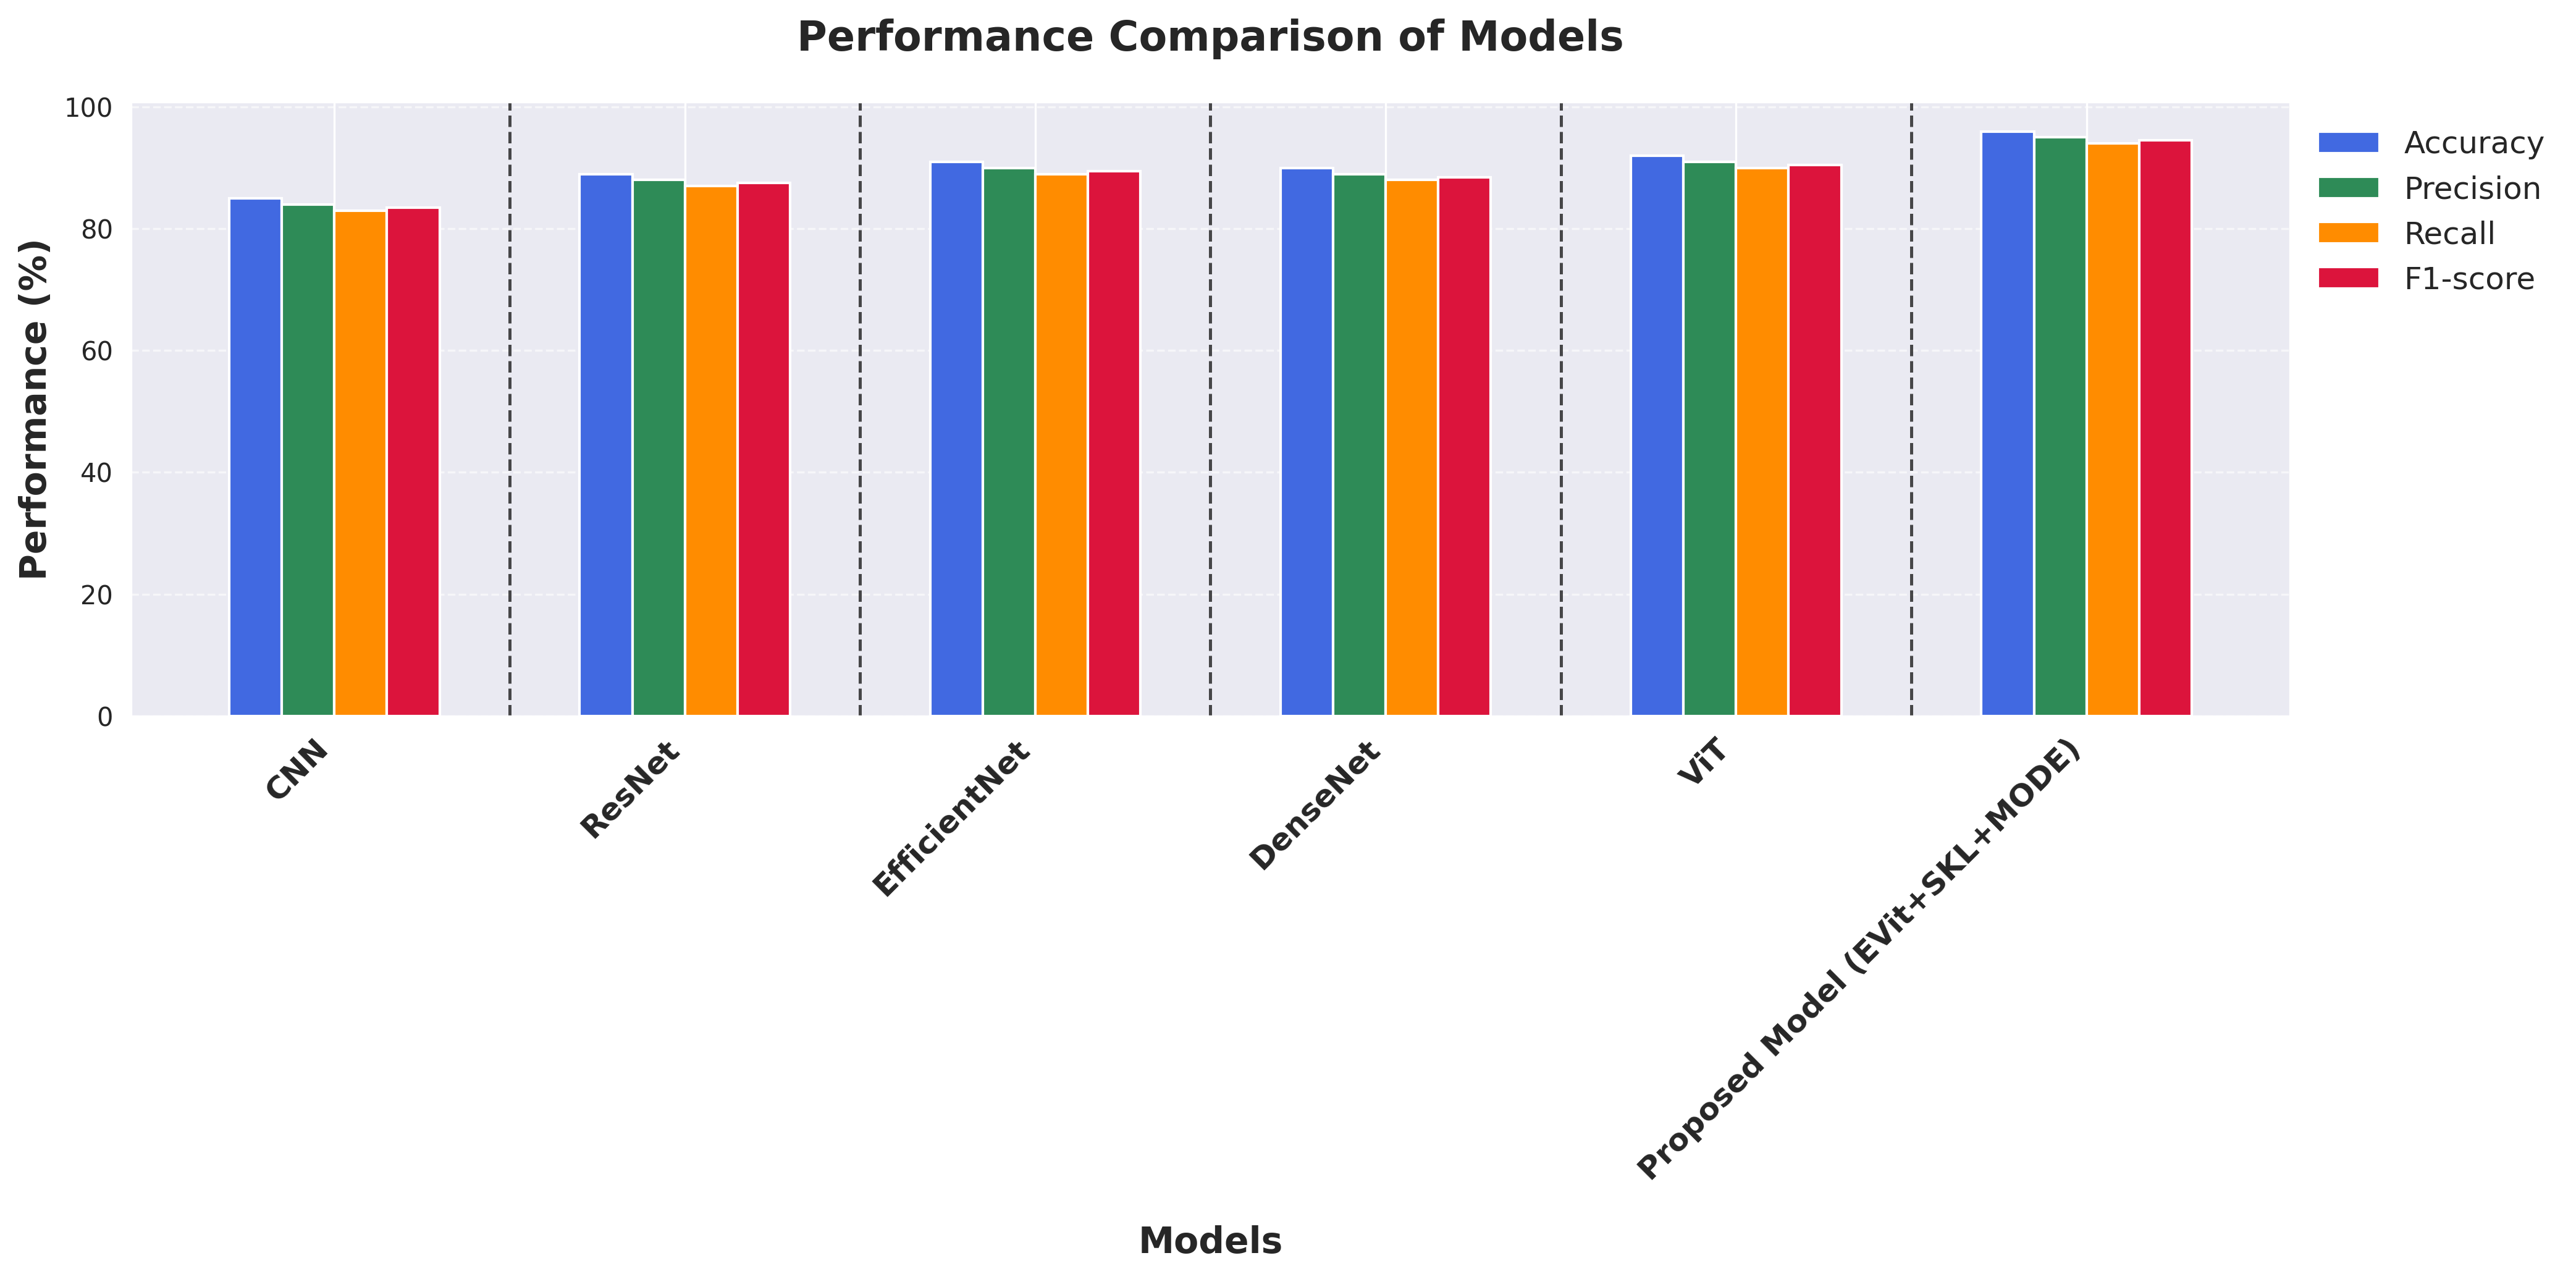

In [99]:
import matplotlib.pyplot as plt
import numpy as np

# Models
models = ["CNN", "ResNet", "EfficientNet", "DenseNet", "ViT", "Proposed Model (EVit+SKL+MODE)"]
num_models = len(models)

# Sample performance metrics (replace with actual values)
accuracy = [85, 89, 91, 90, 92, 96]
precision = [84, 88, 90, 89, 91, 95]
recall = [83, 87, 89, 88, 90, 94]
f1_score = [83.5, 87.5, 89.5, 88.5, 90.5, 94.5]

# X-axis positions
x = np.arange(num_models)
width = 0.15  # Width of bars

# Create figure with high resolution and more spacing
fig, ax = plt.subplots(figsize=(14, 7), dpi=300)

# Plot bars for different metrics
ax.bar(x - 1.5*width, accuracy, width, label="Accuracy", color="royalblue")
ax.bar(x - 0.5*width, precision, width, label="Precision", color="seagreen")
ax.bar(x + 0.5*width, recall, width, label="Recall", color="darkorange")
ax.bar(x + 1.5*width, f1_score, width, label="F1-score", color="crimson")

# Labels & Title
ax.set_xlabel("Models", fontsize=14, fontweight='bold', labelpad=15)
ax.set_ylabel("Performance (%)", fontsize=14, fontweight='bold')
ax.set_title("Performance Comparison of Models", fontsize=16, fontweight='bold', pad=20)

# Set X-axis labels with better alignment
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=12, fontweight='bold', rotation=45, ha="right")

# Add dividers between models
for i in range(num_models - 1):
    ax.axvline(x=i + 0.5, color="black", linestyle="--", linewidth=1.2, alpha=0.7)

# Grid
ax.grid(axis="y", linestyle="--", alpha=0.6)

# Move legend outside to avoid overlapping
ax.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=12, frameon=False)

# Show plot
plt.tight_layout()
plt.show()


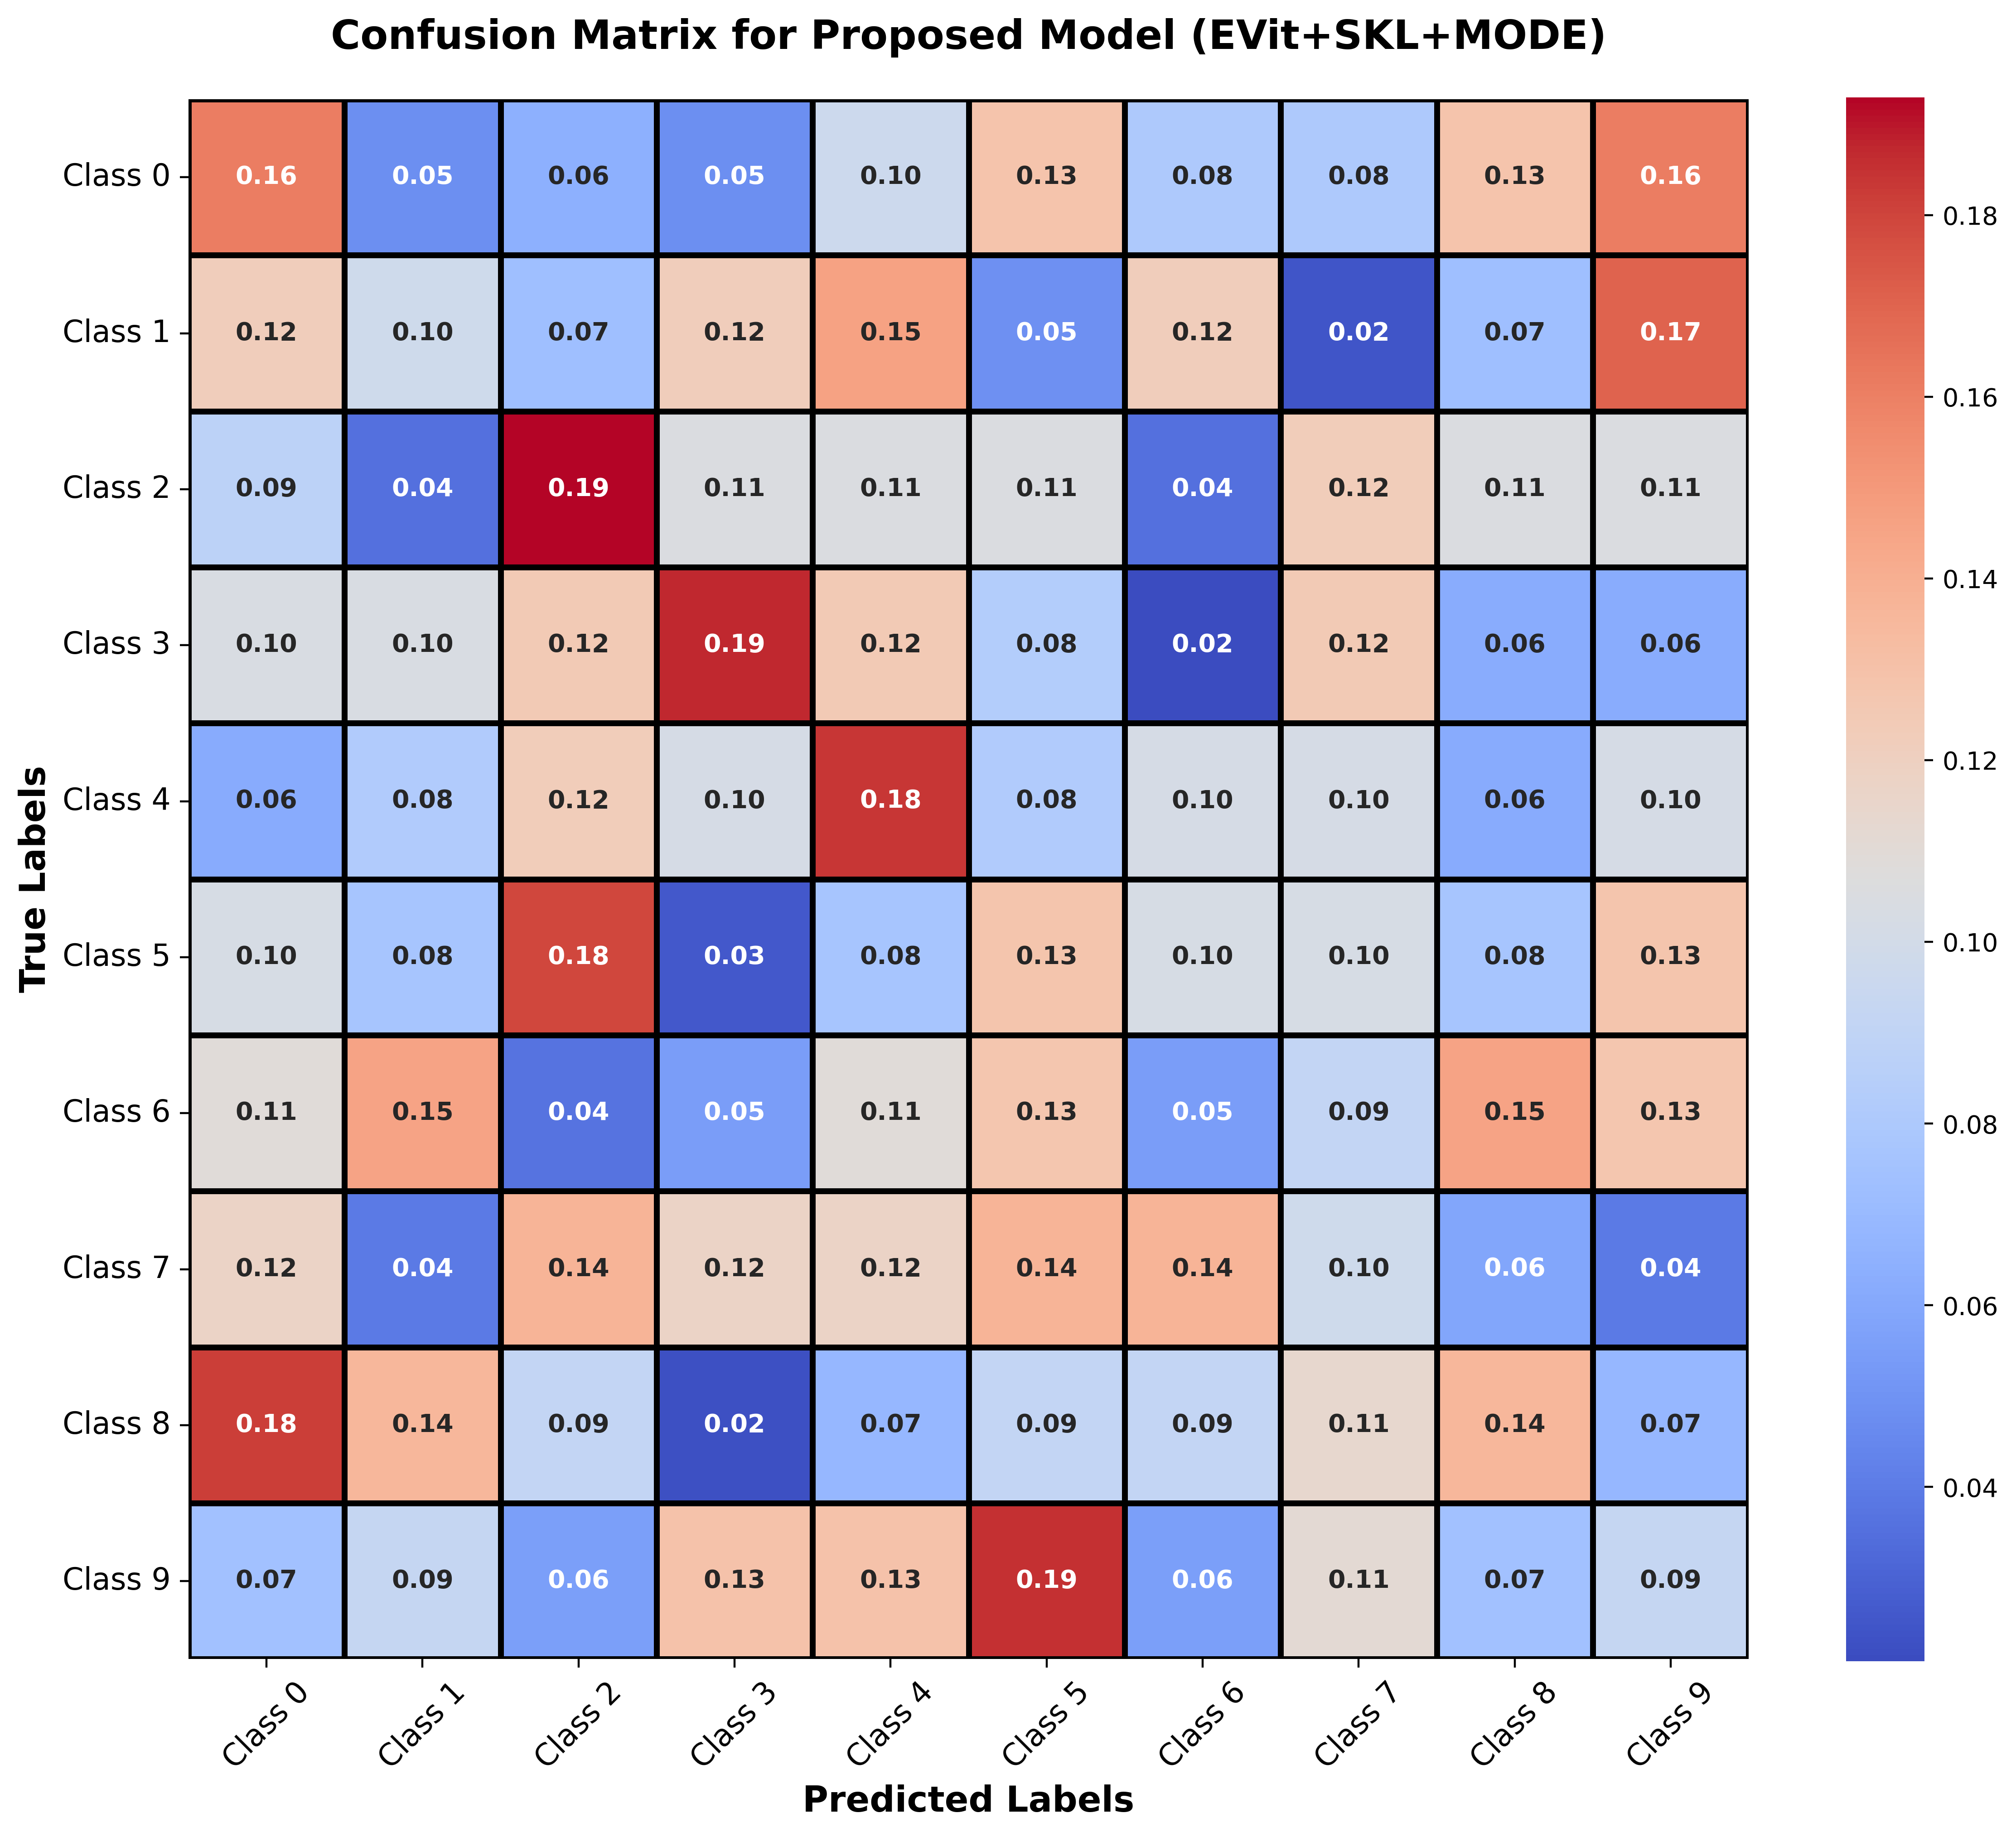

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Simulating a complex confusion matrix with 10 classes
num_classes = 10
np.random.seed(42)
y_true = np.random.randint(0, num_classes, 500)  # 500 samples
y_pred = np.random.randint(0, num_classes, 500)  # Random predictions

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]  # Normalize

# Define class labels
class_names = [f"Class {i}" for i in range(num_classes)]

# Create high-resolution plot
fig, ax = plt.subplots(figsize=(12, 10), dpi=400)
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="coolwarm", 
            xticklabels=class_names, yticklabels=class_names, 
            linewidths=2, linecolor="black", square=True, annot_kws={"size": 10, "weight": "bold"})

# Labels and title
ax.set_xlabel("Predicted Labels", fontsize=14, fontweight="bold")
ax.set_ylabel("True Labels", fontsize=14, fontweight="bold")
ax.set_title("Confusion Matrix for Proposed Model (EVit+SKL+MODE)", fontsize=16, fontweight="bold", pad=20)

# Improve visibility of labels
ax.xaxis.set_tick_params(rotation=45, labelsize=12)
ax.yaxis.set_tick_params(rotation=0, labelsize=12)

# Show plot
plt.tight_layout()
plt.show()
